In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rooth_path = '../data/'
generator_train = pd.read_csv(rooth_path + 'generator_train.csv')
gen_bear_train = pd.read_csv(rooth_path + 'gen_bear_train.csv')
transformer_train = pd.read_csv(rooth_path + 'transformer_train.csv')
hydraulic_train = pd.read_csv(rooth_path + 'hydraulic_train.csv')
gearbox_train = pd.read_csv(rooth_path + 'gearbox_train.csv')
logs_gen_train = pd.read_csv(rooth_path + 'logs_gen_train.csv')
logs_bear_train = pd.read_csv(rooth_path + 'logs_gen_bear_train.csv')
logs_transf_train = pd.read_csv(rooth_path + 'logs_transformer_train.csv')
logs_hyd_train = pd.read_csv(rooth_path + 'logs_hydraulic_train.csv')
logs_gear_train = pd.read_csv(rooth_path + 'logs_gearbox_train.csv')
logs_df = pd.read_csv(rooth_path + 'training/' + 'wind-farm-1-logs-training.csv')
failures_df = pd.read_csv(rooth_path + 'training/' + 'wind-farm-1-failures-training.csv')

#### Do some exploration data analysis

- Let's start with the logs df to see if we can find any correlation for the abnormal behaviour of the turbines (maybe we can add it to the actual datasets)
- Then let's explore each of the components dataframes

### Logs
Note: It should be better to gain some knowledge within some people in the area to explain which logs explain abnormal behaviour

In [3]:
logs_df['TimeDetected'] = pd.to_datetime(logs_df['TimeDetected'])
failures_df['Timestamp'] = pd.to_datetime(failures_df['Timestamp'])

In [4]:
# Sort by UnitTitle and TimeDetected
logs_df.sort_values(by=['UnitTitle', 'TimeDetected'], inplace=True)
logs_df.drop(columns=['UnitTitleDestination'], inplace=True)

In [5]:
# See how many different messages do we have
logs_df['Remark'].nunique()

5051

In [6]:
logs_df.head()

,TimeDetected,TimeReset,UnitTitle,Remark
3,2016-01-01 00:15:27+00:00,NaN,T01,Generator 1 in
4,2016-01-01 00:15:44+00:00,NaN,T01,External power ref.:2000kW
10,2016-01-01 00:45:43+00:00,NaN,T01,External power ref.:2000kW
15,2016-01-01 01:15:43+00:00,NaN,T01,External power ref.:2000kW
20,2016-01-01 01:45:43+00:00,NaN,T01,External power ref.:2000kW


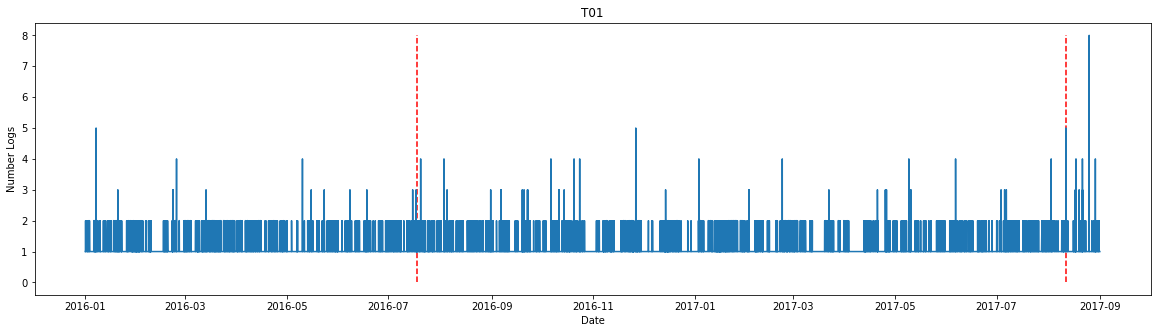

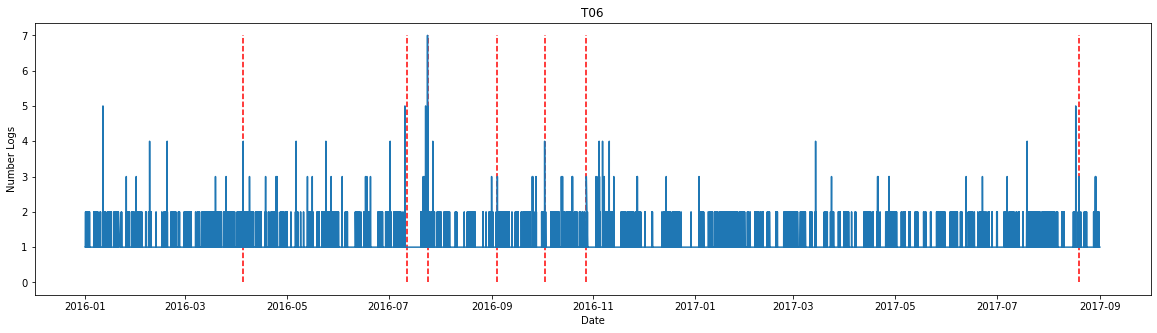

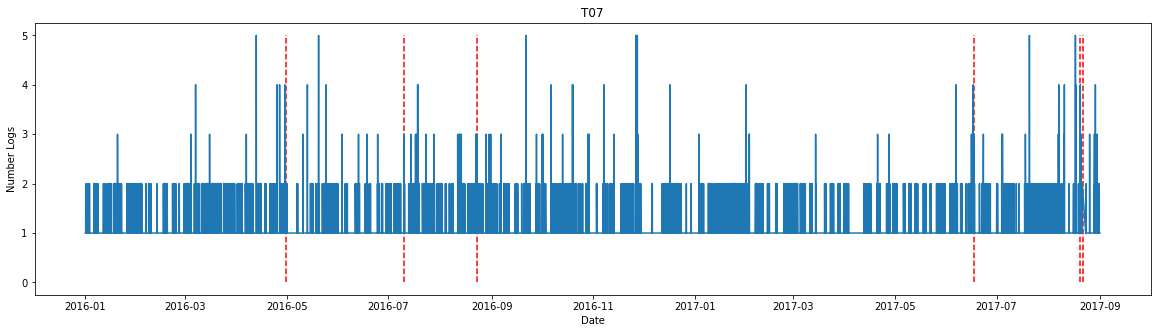

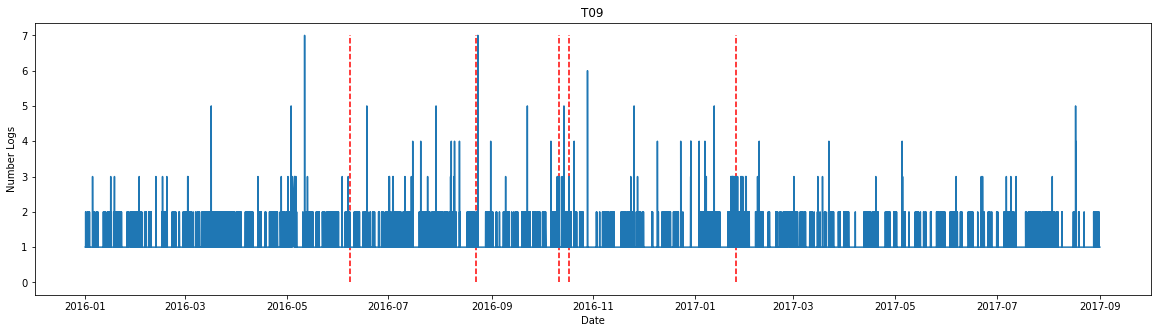

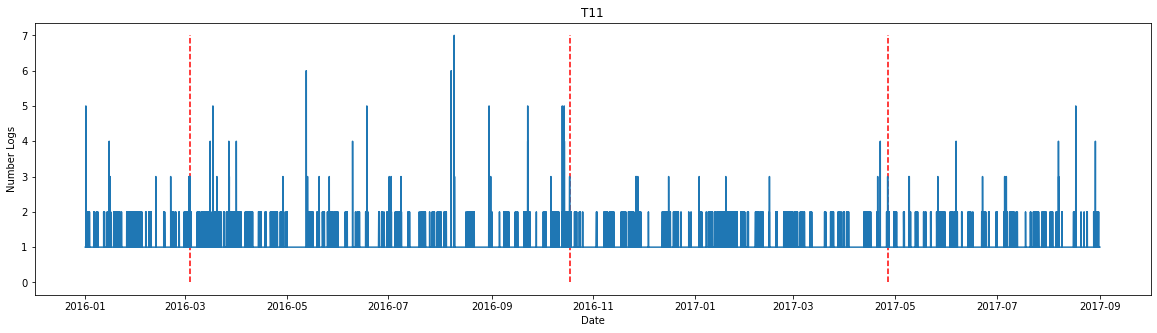

In [7]:
# We can't know which logs are malfuntion logs or normal behaviour logs
# See if there is an evident increase of nº logs before the failures
turbines = ['T01', 'T06', 'T07', 'T09', 'T11']
temp = logs_df.groupby(by=['UnitTitle', 'TimeDetected']).count().reset_index()
for turbine in turbines:
    plt.figure(figsize=(20,5)) 
    temp_ = temp[temp['UnitTitle']==turbine]
    failures_df_ = failures_df[failures_df['Turbine_ID']==turbine]
    plt.plot(temp_['TimeDetected'], temp_['Remark'])
    plt.vlines(x=failures_df_['Timestamp'], color='red', linestyle= '--', ymin=0, ymax=max(temp_['Remark']))
    plt.title(turbine)
    plt.xlabel("Date")
    plt.ylabel("Number Logs")
    plt.show()

##### We can't really see a clear correlation between the increasing number of logs before a turbine failure. It should be interesting to know what logs are error logs, but we don't have an expert nearby

In [8]:
# See how many "error" messages we have in the logs_df
print(logs_df['Remark'].str.contains('rror').sum())

176


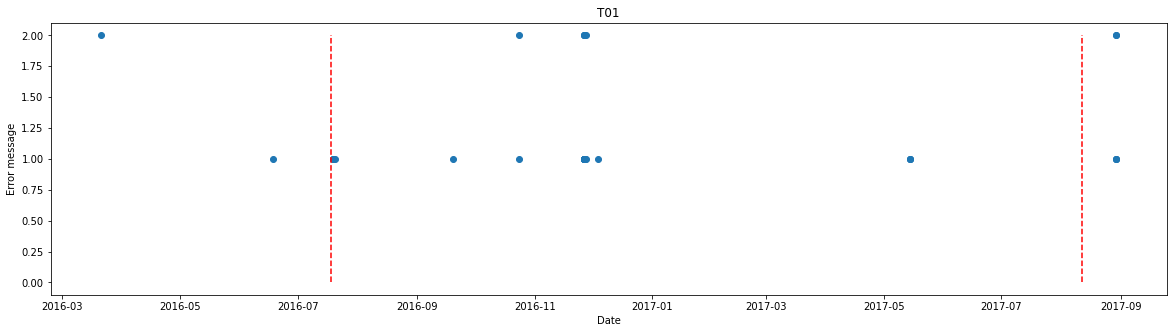

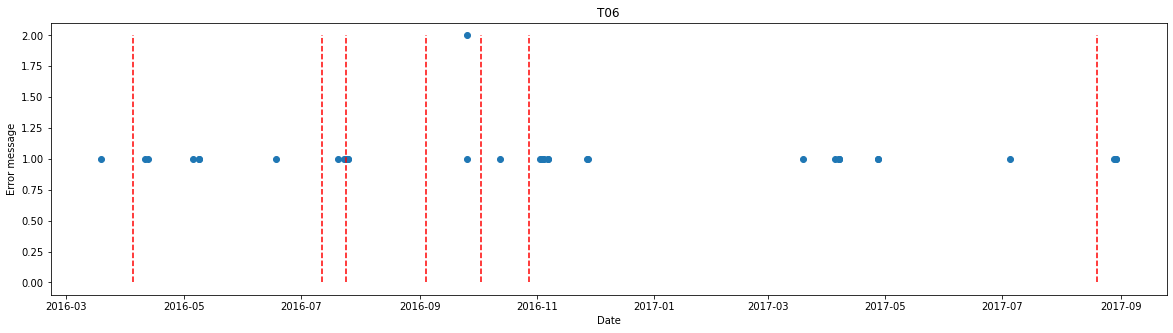

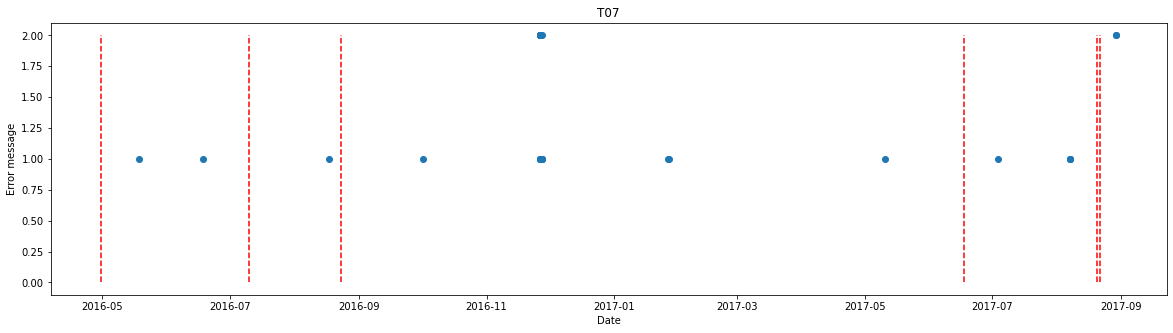

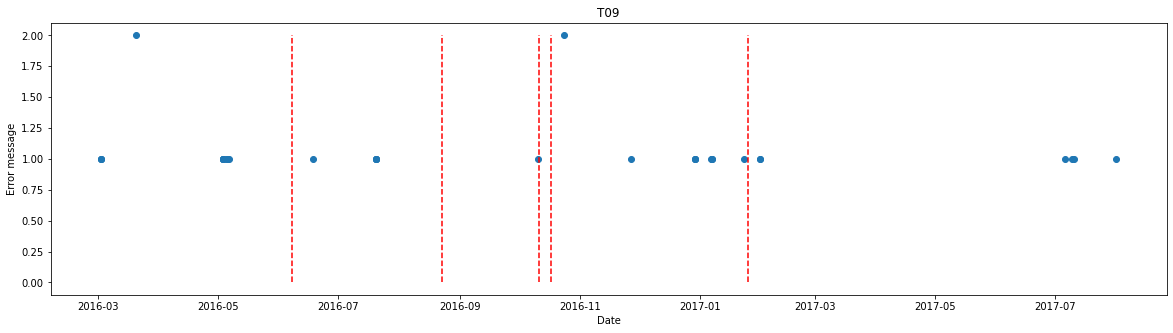

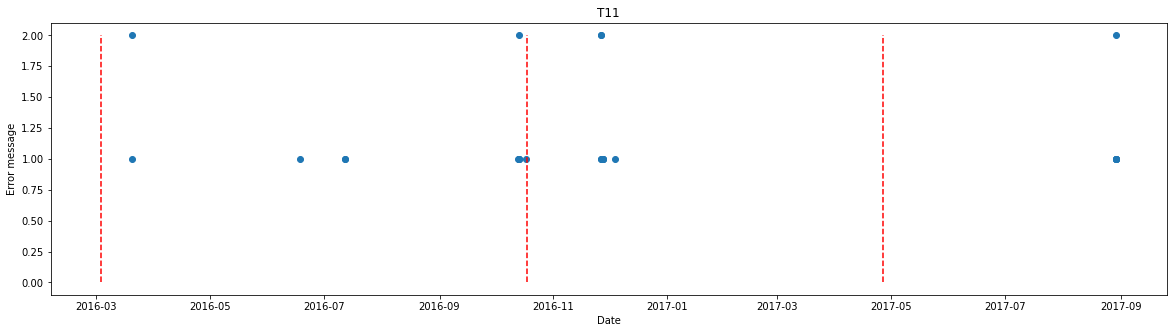

In [9]:
# Lets see there is evidence between the number of errors messages and failures
error = logs_df[logs_df['Remark'].str.contains('rror')]
temp = error.groupby(by=['UnitTitle', 'TimeDetected']).count().reset_index()
for turbine in turbines:
    plt.figure(figsize=(20,5)) 
    temp_ = temp[temp['UnitTitle']==turbine]
    failures_df_ = failures_df[failures_df['Turbine_ID']==turbine]
    plt.scatter(temp_['TimeDetected'], temp_['Remark'])
    plt.vlines(x=failures_df_['Timestamp'], color='red', linestyle= '--', ymin=0, ymax=max(temp_['Remark']))
    plt.title(turbine)
    plt.xlabel("Date")
    plt.ylabel("Error message")
    plt.show()

##### Again, we can't really see a clear correlation between the error messages before a turbine failure. It should be interesting to know what logs are error logs, but we don't have an expert nearby

In [10]:
# Let's try to see which kind of logs there is in the 60 days before a failure



### Analysis on Generator

In [12]:
generator_train.head()

,Turbine_ID,Date,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Cont_Top_Temp_Avg_sd,Cont_Hub_Temp_Avg_sd,Cont_VCP_Temp_Avg_sd,Nac_Temp_Avg_sd,Nac_Direction_Avg_sd,Spin_Temp_Avg_sd,Grd_Busbar_Temp_Avg_sd,Component_GENERATOR,TTF,Failure
0,T01,2016-01-01,1258.952778,929.964583,1100.689583,92.588194,39.354167,56.444444,56.430556,55.895833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
1,T01,2016-01-02,699.955556,493.626389,603.794444,58.183333,34.076389,45.527778,45.312500,44.847222,...,2.013290,1.625364,2.558352,0.623629,45.821993,1.433855,3.353847,0.0,0.0,0
2,T01,2016-01-03,929.293750,756.286806,862.535417,40.109028,42.791667,55.340278,53.944444,52.965278,...,1.639850,1.321131,2.531003,0.728086,44.775715,1.251523,3.045330,0.0,0.0,0
3,T01,2016-01-04,1711.199306,1499.402083,1626.701389,39.796528,65.291667,98.659722,94.847222,93.381944,...,2.890193,1.145097,3.215982,2.494331,45.540714,1.022578,4.936933,0.0,0.0,0
4,T01,2016-01-05,1672.504167,1436.100000,1567.234028,49.702083,56.298611,91.402778,88.159722,86.909722,...,2.556940,1.265229,2.818498,2.169350,55.760338,1.387065,4.519062,0.0,0.0,0


In [16]:
generator_train.describe()

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Gen_SlipRing_Temp_Avg,Gen_Bear2_Temp_Avg,...,Cont_Top_Temp_Avg_sd,Cont_Hub_Temp_Avg_sd,Cont_VCP_Temp_Avg_sd,Nac_Temp_Avg_sd,Nac_Direction_Avg_sd,Spin_Temp_Avg_sd,Grd_Busbar_Temp_Avg_sd,Component_GENERATOR,TTF,Failure
count,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,...,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000
mean,1163.781520,909.566837,1039.702759,68.153352,46.887986,63.168338,62.993075,62.501560,29.547744,43.059864,...,3.521612,2.064798,3.474460,2.784901,69.139652,2.211405,5.232794,0.003293,12.091109,0.115258
std,415.110918,400.998464,412.164658,26.392552,13.689701,22.719275,22.030429,21.513542,7.632075,11.832189,...,0.747707,0.503514,0.636374,0.696921,10.408724,0.611330,0.926060,0.057307,34.982139,0.319421
min,0.000000,0.000000,0.000000,0.000000,21.527778,24.201389,24.173611,24.083333,17.166667,22.673611,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,835.025040,564.261979,699.039063,48.755903,37.239583,46.918403,47.279514,46.984082,23.710728,34.741319,...,3.066741,1.633006,3.036157,2.282827,65.957771,1.683141,4.602494,0.000000,0.000000,0.000000
50%,1185.346875,898.404861,1046.512847,65.744097,43.743056,55.552083,55.663194,55.493056,28.399306,40.562500,...,3.449923,2.052642,3.515456,2.745987,69.990834,2.228447,5.240343,0.000000,0.000000,0.000000
75%,1555.545660,1272.830729,1426.134896,84.022117,54.352431,75.350694,75.105903,74.520833,33.611111,49.376736,...,4.013208,2.397687,3.860970,3.259560,75.716869,2.708947,5.839778,0.000000,0.000000,0.000000
max,1792.761111,1614.880556,1680.684028,188.073611,205.000000,205.000000,205.000000,205.000000,92.400000,205.000000,...,5.605026,3.428363,5.239366,4.523134,86.626533,3.693722,7.648684,1.000000,192.000000,1.000000


In [21]:
# get ordered list of top variance features:
features = generator_train.columns
features_top_var = generator_train[features].std().sort_values(ascending=False)
features_top_var

Gen_RPM_Max               415.110918
Gen_RPM_Avg               412.164658
Gen_RPM_Min               400.998464
Gen_RPM_Max_av             78.236166
Nac_Direction_Avg          75.666265
                             ...    
Blds_PitchAngle_Std_av      0.214303
Blds_PitchAngle_Std_sd      0.156084
Amb_WindSpeed_Std_av        0.125071
Amb_WindSpeed_Std_sd        0.106074
Component_GENERATOR         0.057307
Length: 84, dtype: float64

In [23]:
generator_train.columns

Index(['Turbine_ID', 'Date', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Gen_SlipRing_Temp_Avg',
       'Gen_Bear2_Temp_Avg', 'Amb_WindSpeed_Max', 'Amb_WindSpeed_Min',
       'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Avg.1', 'Amb_WindSpeed_Std',
       'Amb_Temp_Avg', 'Blds_PitchAngle_Max', 'Blds_PitchAngle_Min',
       'Blds_PitchAngle_Avg', 'Blds_PitchAngle_Std', 'Cont_Top_Temp_Avg',
       'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg', 'Nac_Temp_Avg',
       'Nac_Direction_Avg', 'Spin_Temp_Avg', 'Grd_Busbar_Temp_Avg',
       'Gen_RPM_Max_av', 'Gen_RPM_Min_av', 'Gen_RPM_Avg_av', 'Gen_RPM_Std_av',
       'Gen_Bear_Temp_Avg_av', 'Gen_Phase1_Temp_Avg_av',
       'Gen_Phase2_Temp_Avg_av', 'Gen_Phase3_Temp_Avg_av',
       'Gen_SlipRing_Temp_Avg_av', 'Gen_Bear2_Temp_Avg_av',
       'Amb_WindSpeed_Max_av', 'Amb_WindSpeed_Min_av', 'Amb_WindSpeed_Avg_av',
       'Amb_WindSpeed_Avg_av.

In [22]:
# See if there is an abnormal behaviour 60 days before the failure
#Plot behaviour for all turbines
turbines = ['T01', 'T06', 'T07', 'T09', 'T11']
for turbine in turbines:
    temp = generator_train[generator_train['Turbine_ID']==turbine]
    sns.scatterplot(x=generator_train['Amb_WindSpeed_Avg'], y=generator_train['Prod_LatestAvg_TotActPwr'], hue=generator_train['Failure'])
    plt.title(turbine)
    plt.xlabel("Wind Speed")
    plt.ylabel("TotActPwr")
    plt.axvline(x=5, color='red', linestyle= '--')
    plt.axvline(x=12, color='red', linestyle= '--')
    plt.show()

KeyError: 'Prod_LatestAvg_TotActPwr'